In [2]:
BASEDIR = "/home/merlijn/PHD/PAPERS, PRESENTATIONS, CONFERENCES & PROPOSALS/Software: Practice and Experience/results"

import pandas
data = pandas.read_csv(
    BASEDIR + '/multiple_soy_clusters.log',
    delim_whitespace=True,
)

data2 = pandas.read_csv(
    BASEDIR + '/multiple_soy_clusters-1.log',
    delim_whitespace=True,
)

In [3]:

grouped = data.groupby(
    ['clustrs']
).agg(
    {'elapsed_time':['mean','std']}
)

grouped.head()


elapsed_time          
                mean       std
clustrs                       
5           0.385803  0.066011
10          0.760414  0.128589
15          1.086062  0.193010
20          1.496717  0.312506
25          1.762723  0.242445

In [4]:
merged = grouped
final = merged.reset_index()
final.columns = ['clusters', 'mean', 'std']
final.head()

,clusters,mean,std
0,5,0.385803,0.066011
1,10,0.760414,0.128589
2,15,1.086062,0.193010
3,20,1.496717,0.312506
4,25,1.762723,0.242445


In [5]:
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt


def create_sane_figure():
    # You typically want your plot to be ~1.33x wider than tall.
    # Common sizes: (10, 7.5) and (12, 9)
    fig = plt.figure(figsize=(12, 6))  # a new figure window
    ax = fig.add_subplot(1, 1, 1)      # specify (nrows, ncols, axnum)

    # Put the axis behind the datapoints
    ax.set_axisbelow(True)
    # Grey ticks, labels, and axis'
    for spine in ax.spines.values():
        spine.set_color('black')
    for line in ax.get_xticklines() + ax.get_yticklines():
        line.set_color('black')
    ax.set_xlabel(None, fontsize=16, color='black')
    ax.set_ylabel(None, fontsize=16, color='black')
    # Don't show a grid
    ax.grid(False)
    # remove top and right border of graph
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.tick_params(
        axis='both', which='both',
        labelsize=14, labelcolor='black',
        color='black')
    # Make the title big enough so it spans the entire plot, but don't make it
    # so big that it requires two lines to show.
    ax.set_title(None, fontsize=22, color='black')
    return (fig, ax)

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


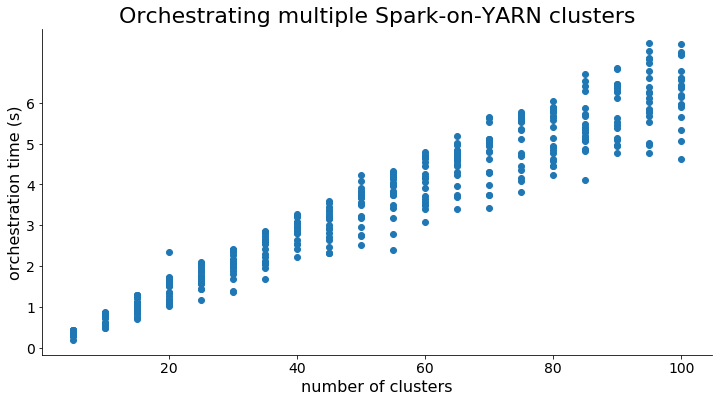

In [6]:
%matplotlib inline

def create_multiple_soy_clusters():
    (fig, ax) = create_sane_figure()

    ax.set_title("Orchestrating multiple Spark-on-YARN clusters", fontsize=22)
    ax.set_xlabel("number of clusters")
    ax.set_ylabel("orchestration time (s)")

    ax.set_xticks(range(0, 101, 20))
    ax.set_yticks(np.arange(0, 7, 1))

#     # Now put the actual data in the plot
#     ax.errorbar(
#         final.clusters, final['mean'],
#         yerr=final['std'],
#         label="concurrency potential",
#         linestyle='None',
#         capsize=5,
#         fmt='o',
 
#     )
    ax.plot(
        data['clustrs'], data['elapsed_time'],'o',
    )
#     ax.plot(
#         data2['clustrs'], data2['elapsed_time'],'o', color="black"
#     )
    # Save the plot to a file
    # fig.savefig("multiple_soy_clusters.png", bbox_inches="tight")
    fig.savefig("multiple_soy_clusters.pdf", bbox_inches="tight")
    fig.show()
create_multiple_soy_clusters()